# Imports

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_absolute_error as mae, accuracy_score, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from preprocess import preprocess, process, league_train_test_split

# Data

In [47]:
data = pd.read_csv('jobfair_train.csv')

In [48]:
data.head()

,season,club_id,league_id,dynamic_payment_segment,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_stars_top_14_players,avg_training_factor_top_11_players,days_active_last_28_days,...,registration_country,registration_platform_specific,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash,league_rank
0,173,6042825,2912348,2) Minnow,134,25,5.255151,4.483009,1.778801,25,...,Portugal,Flash FB Canvas,24,435,11.0,598,245,186,818,2
1,173,9620967,2912140,2) Minnow,28,23,4.962521,4.785648,-0.002687,28,...,Turkey,Android Phone,19,58,7.0,269,0,35,24,2
2,173,6045474,2912933,4) Whale,136,23,11.105782,10.511133,0.628794,28,...,Belgium,Flash FB Canvas,26,116,8.0,23180,369,444,4933,1
3,173,14187773,2910371,0) NonPayer,2,21,4.164848,4.023486,0.551904,12,...,Malaysia,Android Phone,11,22,2.0,41,43,213,126,6
4,173,13694853,2907632,0) NonPayer,5,22,3.031939,2.926029,0.690544,0,...,Italy,iOS Phone,9,0,4.0,0,16,100,147,10


In [49]:
leagues = np.random.choice(data['league_id'].unique(), size=int(0.1*data['league_id'].unique().shape[0]))

In [50]:
len(leagues)

395

In [51]:
data[data['league_id'].isin(leagues)]

,season,club_id,league_id,dynamic_payment_segment,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_stars_top_14_players,avg_training_factor_top_11_players,days_active_last_28_days,...,registration_country,registration_platform_specific,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash,league_rank
1,173,9620967,2912140,2) Minnow,28,23,4.962521,4.785648,-0.002687,28,...,Turkey,Android Phone,19,58,7.0,269,0,35,24,2
32,173,968479,2912669,3) Dolphin,163,22,6.295430,6.051619,0.690591,28,...,Bulgaria,Flash FB Canvas,18,67,4.0,146,302,384,1213,4
38,173,11980130,2912140,0) NonPayer,14,20,5.519539,5.174924,0.618609,25,...,Turkey,Android Phone,14,38,6.0,9,698,760,1164,7
44,173,8290071,2912669,1) ExPayer,37,25,6.254170,6.036029,0.816782,16,...,Spain,Android Phone,6,37,5.0,50,6,28,0,11
68,173,13308152,2909266,0) NonPayer,7,23,4.604170,4.433981,0.499565,28,...,France,Android Phone,23,52,NaN,102,8,91,117,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55252,173,14472643,2905929,0) NonPayer,1,24,3.601115,3.414552,0.530466,8,...,Indonesia,Android Phone,6,8,NaN,77,10,58,33,11
55260,173,13625040,2911686,2) Minnow,5,23,5.721746,5.449153,0.510841,26,...,Brazil,Android Phone,15,51,8.0,119,75,35,25,3
55262,173,14070587,2906770,0) NonPayer,3,22,2.846267,2.751810,0.678421,0,...,Indonesia,Android Phone,10,0,NaN,0,42,60,69,8
55286,173,14046338,2907940,2) Minnow,3,25,5.029588,4.881657,0.596012,28,...,Brazil,Android Phone,22,134,1.0,104,4,37,86,4


In [76]:
data.groupby('league_id').size().values

array([14, 14, 14, ..., 14, 14, 14], dtype=int64)

In [52]:
set(data['club_id'].value_counts().values)

{1}

In [53]:
print(len(data['league_id'].unique())*14, data.shape[0])

55314 55314


In [54]:
test_data = pd.read_csv('jobfair_test.csv')

In [55]:
test_data['club_id'].shape

(60270,)

In [56]:
club_match_cnt = 0
for club_id in test_data['club_id'].values:
    if club_id in data['club_id'].values:
        club_match_cnt += 1
club_match_cnt

32219

In [57]:
league_match_cnt = 0
for league_id in test_data['league_id'].values:
    if league_id in data['league_id'].values:
        league_match_cnt += 1
league_match_cnt

0

In [58]:
data.head()

,season,club_id,league_id,dynamic_payment_segment,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_stars_top_14_players,avg_training_factor_top_11_players,days_active_last_28_days,...,registration_country,registration_platform_specific,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash,league_rank
0,173,6042825,2912348,2) Minnow,134,25,5.255151,4.483009,1.778801,25,...,Portugal,Flash FB Canvas,24,435,11.0,598,245,186,818,2
1,173,9620967,2912140,2) Minnow,28,23,4.962521,4.785648,-0.002687,28,...,Turkey,Android Phone,19,58,7.0,269,0,35,24,2
2,173,6045474,2912933,4) Whale,136,23,11.105782,10.511133,0.628794,28,...,Belgium,Flash FB Canvas,26,116,8.0,23180,369,444,4933,1
3,173,14187773,2910371,0) NonPayer,2,21,4.164848,4.023486,0.551904,12,...,Malaysia,Android Phone,11,22,2.0,41,43,213,126,6
4,173,13694853,2907632,0) NonPayer,5,22,3.031939,2.926029,0.690544,0,...,Italy,iOS Phone,9,0,4.0,0,16,100,147,10


# Feature engineering, selection and cleansing

##### Interaction Features

In [59]:
data['age_stars_interaction'] = data['avg_stars_top_11_players'] / data['avg_age_top_11_players']
data['playtime_wins_interaction'] = data['playtime_last_28_days'] * data['league_match_won_count_last_28_days']
data['playtime_active_interaction'] = data['playtime_last_28_days'] * data['days_active_last_28_days']
data['playtime_session_interaction'] = data['playtime_last_28_days'] * data['session_count_last_28_days']
data['session_wins_interaction'] = data['session_count_last_28_days'] * data['league_match_won_count_last_28_days']
data['wins_session_ratio'] = data['session_count_last_28_days'] / (data['league_match_won_count_last_28_days']+1)
data['watched_wins_interaction'] = data['league_match_watched_count_last_28_days'] * data['league_match_won_count_last_28_days']
data['train_factor_wins_interaction'] = data['avg_training_factor_top_11_players'] * data['league_match_won_count_last_28_days']
data['train_count_wins_interaction'] = data['training_count_last_28_days'] * data['league_match_won_count_last_28_days']
data['train_factor_train_count_interaction'] = data['training_count_last_28_days'] * data['avg_training_factor_top_11_players']
data['tokens_spent_train_count_interaction'] = data['tokens_spent_last_28_days'] * data['training_count_last_28_days']

##### Agreggation features

In [60]:
data['total_token_usage'] = data['tokens_spent_last_28_days'] + data['tokens_stash']
data['total_stash_usage'] = data['tokens_spent_last_28_days']+ data['tokens_stash'] + \
                            data['rests_stash'] + data['morale_boosters_stash']

In [61]:
data.head()

,season,club_id,league_id,dynamic_payment_segment,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_stars_top_14_players,avg_training_factor_top_11_players,days_active_last_28_days,...,playtime_session_interaction,session_wins_interaction,wins_session_ratio,watched_wins_interaction,train_factor_wins_interaction,train_count_wins_interaction,train_factor_train_count_interaction,tokens_spent_train_count_interaction,total_token_usage,total_stash_usage
0,173,6042825,2912348,2) Minnow,134,25,5.255151,4.483009,1.778801,25,...,22027324982,6504,10.840000,240,42.691230,10440,773.778542,260130,843,1847
1,173,9620967,2912140,2) Minnow,28,23,4.962521,4.785648,-0.002687,28,...,6955364598,2261,5.950000,171,-0.051055,1102,-0.155853,15602,269,328
2,173,6045474,2912933,4) Whale,136,23,11.105782,10.511133,0.628794,28,...,28274409870,5460,7.777778,572,16.348654,3016,72.940147,2688880,23549,28926
3,173,14187773,2910371,0) NonPayer,2,21,4.164848,4.023486,0.551904,12,...,218579544,198,1.500000,0,6.070939,242,12.141879,902,84,423
4,173,13694853,2907632,0) NonPayer,5,22,3.031939,2.926029,0.690544,0,...,0,0,0.000000,0,6.214896,0,0.000000,0,16,263


# Data split

In [62]:
X = data.drop('league_rank', axis=1)
y = data['league_rank']

In [63]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = league_train_test_split(X, y, test_size=0.15, random_state=42)
X_train = X_train.drop(['season', 'league_id', 'club_id'], axis=1)
X_test = X_test.drop(['season', 'league_id', 'club_id'], axis=1)

In [64]:
X_train = preprocess(X_train, y_train)
X_test = process(X_test)

# Model evaluation

In [65]:
model = XGBRegressor(max_depth=2, n_estimators=2048, eval_metric='mae', device='cuda')

In [66]:
cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=4)

array([-2.39139186, -2.39891739, -2.37349041, -2.40960745, -2.3649822 ])

In [67]:
model.fit(X_train, y_train)
model.set_params(device='cpu')

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2048, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [68]:
print(f'Train: {mae(y_train, model.predict(X_train))}')
print(f'Test: {mae(y_test, model.predict(X_test))}')

Train: 2.148598669840527
Test: 2.419575802736833


<AxesSubplot:>

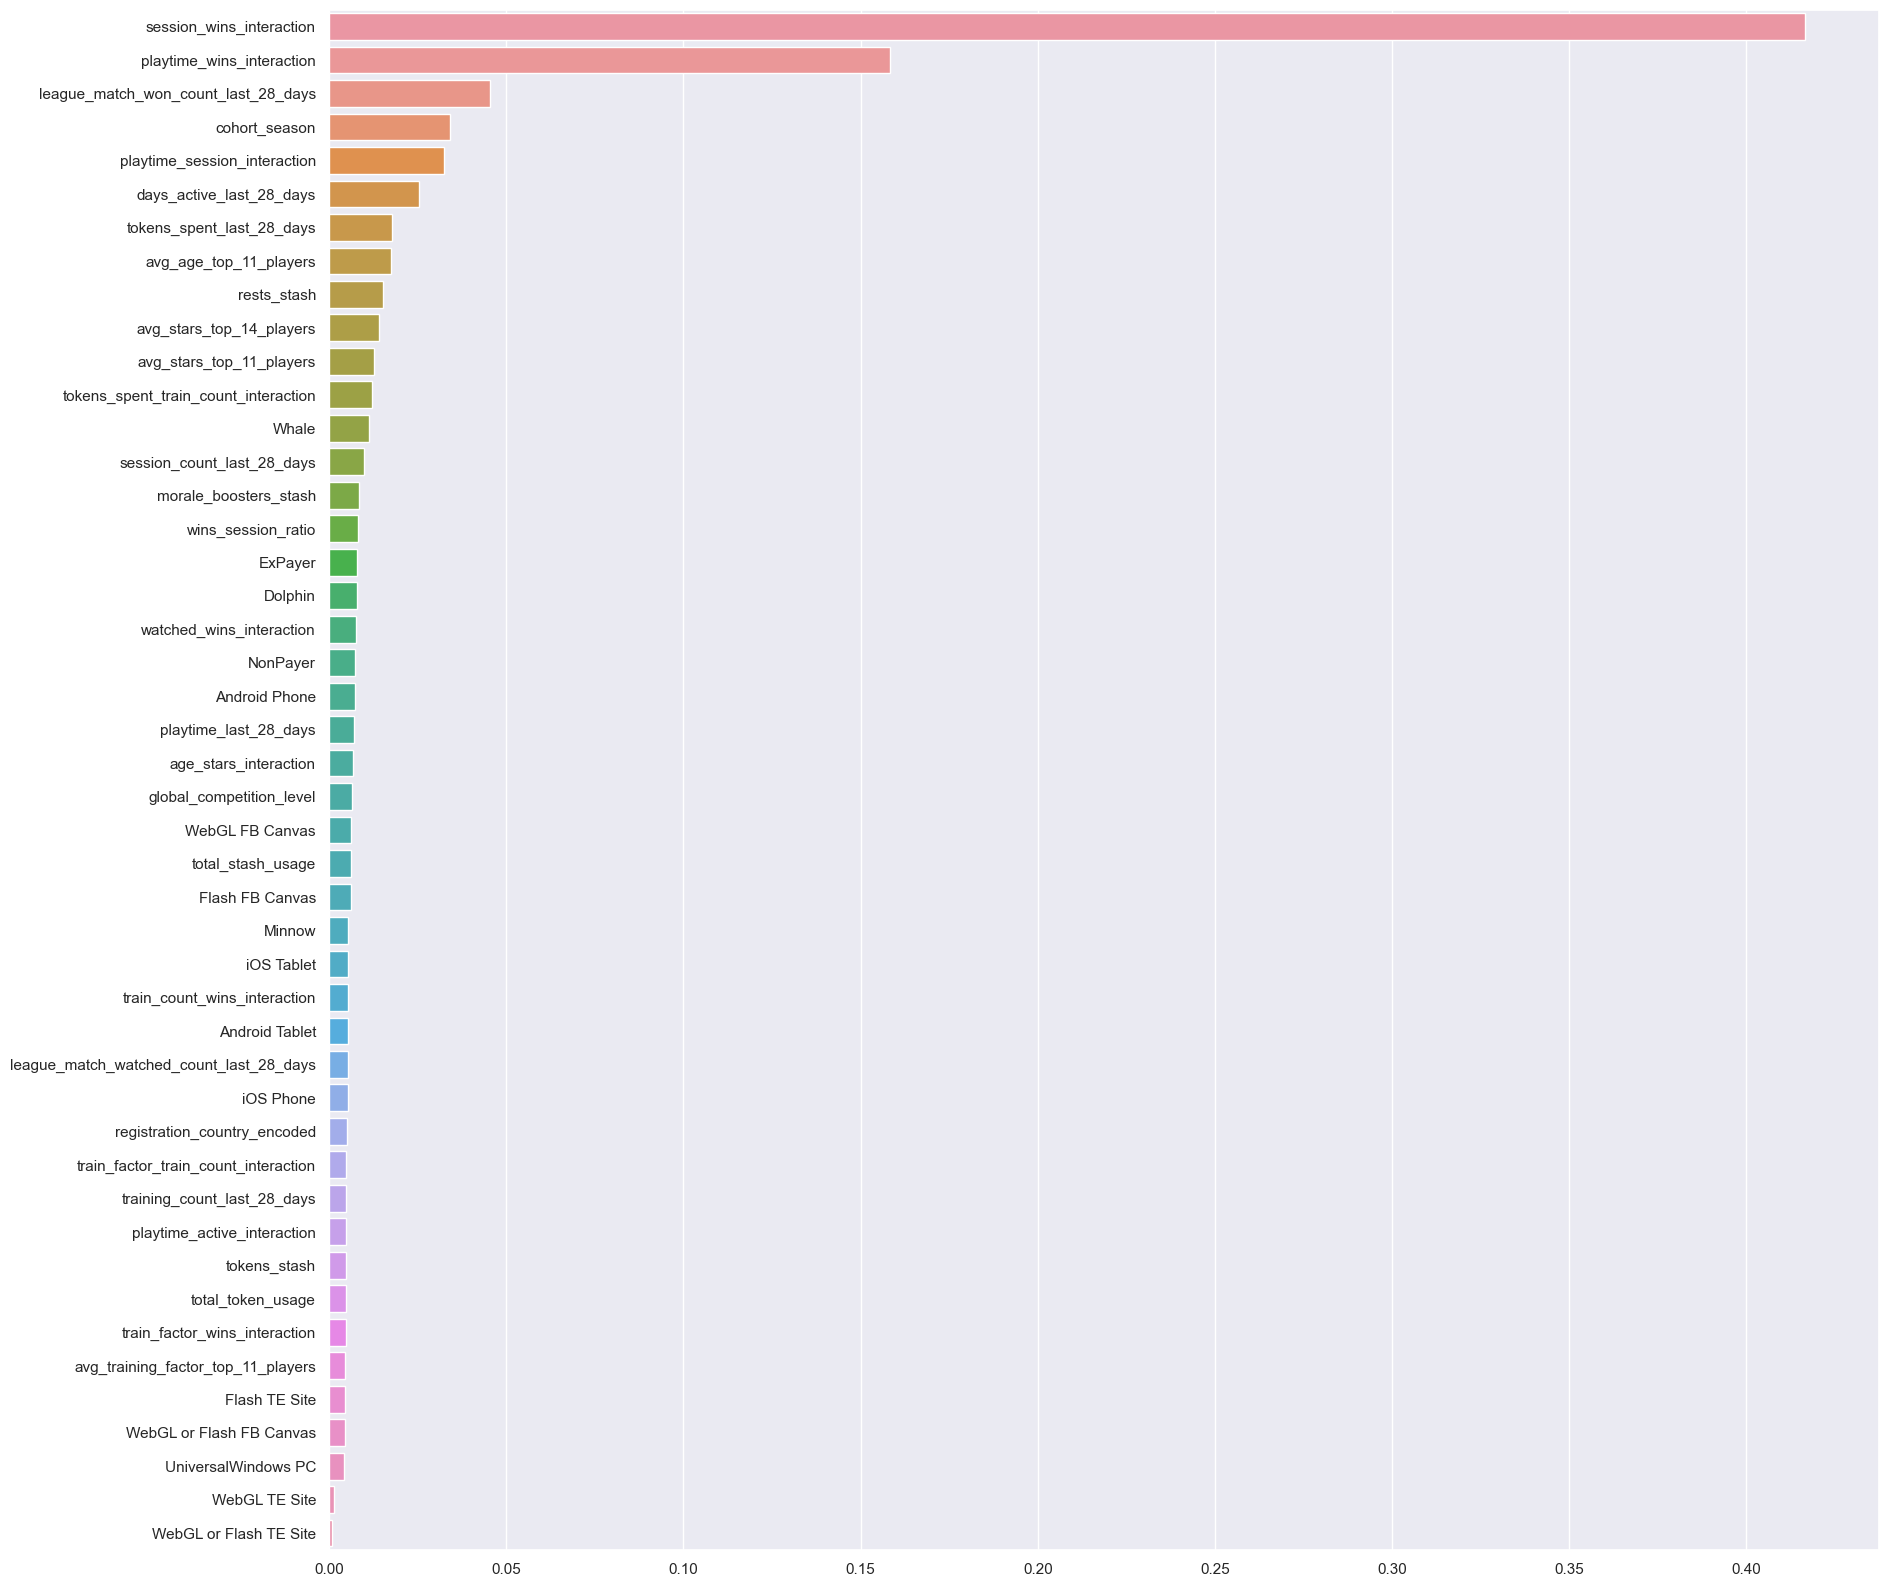

In [69]:
feature_imp = list(zip(*reversed(sorted(list(zip(model.feature_importances_, X_train.columns))))))
sns.set(rc={'figure.figsize': (20, 20)})
sns.barplot(x=list(feature_imp[0]), y=list(feature_imp[1]))